# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

# CODE

## EDA

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [3]:
df = pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop(columns="Loan_ID")
# removing useless feature (loan id)

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
print(f"===TRAINING DATA=== \ndf shape: {df.shape}, \n{df.isnull().sum()}, \nTotal Missing Values: {df.isnull().sum().sum()}")

===TRAINING DATA=== 
df shape: (614, 12), 
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64, 
Total Missing Values: 149


In [11]:
df_test = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")
df_test = df_test.drop(columns="Loan_ID")
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
print(f"===TESTING DATA=== \ndf shape: {df_test.shape}, \n{df_test.isnull().sum()}, \nTotal Missing Values: {df_test.isnull().sum().sum()}")

===TESTING DATA=== 
df shape: (367, 11), 
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64, 
Total Missing Values: 84


In [15]:
# Check data types of features
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test = df_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

label_encoders_test = {}
for col in categorical_cols_test:
    le_test = LabelEncoder()
    df_test[col] = le_test.fit_transform(df_test[col])
    label_encoders_test[col] = le_test


# Check data types of features
numerical_cols_new = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols_new = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test_new = df_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test_new = df_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("LABEL ENCODING\n")
print("===TRAINING DATA===")
print(f"Categorical Columns Before: {categorical_cols} \nCategorical Colums After: {categorical_cols_new}")
print(f"Numerical Columns Before: {numerical_cols} \nCategorical Colums After: {numerical_cols_new}")

print("\n===TESTING DATA===")
print(f"Categorical Columns Before: {categorical_cols_test} \nCategorical Colums After: {categorical_cols_test_new}")
print(f"Numerical Columns Before: {numerical_cols_test} \nCategorical Colums After: {numerical_cols_test_new}")


LABEL ENCODING

===TRAINING DATA===
Categorical Columns Before: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

===TESTING DATA===
Categorical Columns Before: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Proper

<Figure size 2000x3000 with 0 Axes>

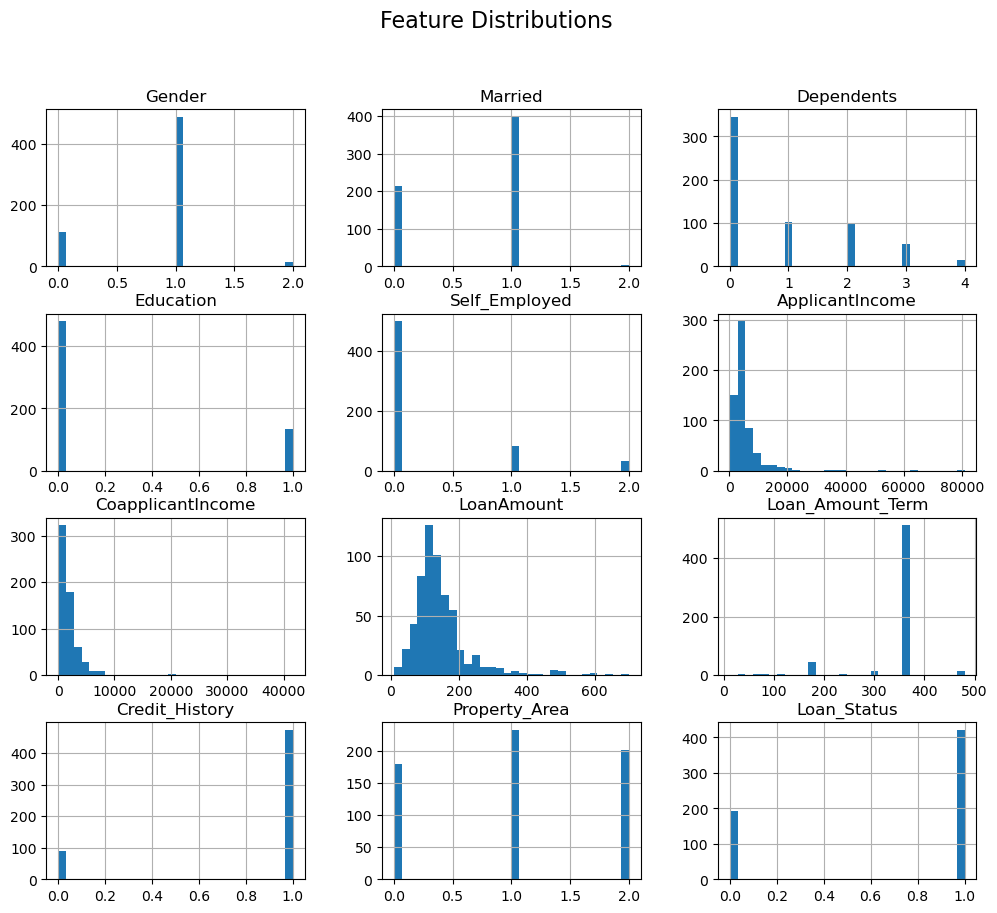

In [17]:
# Feature distributions
plt.figure(figsize=(20, 30))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Here the data is having null values, and hence showing 3 values instead of 2 in Gender, Married Status and Self Employed column. We can handle this data with following different methods:

1. Drop Rows with NaN
2. Fill NaN Values
-    i. Fill with Mode (Most Frequent Value)
-   ii. Create a Separate Category for NaN ("Unknown")
-  iii. Use Predictive Imputation (KNN Multivariate Imputer)

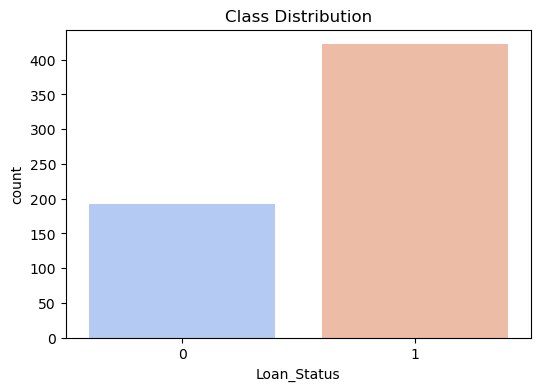

In [19]:
# Visualize class distribution
target_col = "Loan_Status"
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, hue=target_col, palette='coolwarm', legend=False)
plt.title('Class Distribution')
plt.show()


## DATA PREPROCESSING (REMOVING OR FILLING NULL VALUES)

### 1) Drop Rows with NaN Values

In [23]:
df_drop = df.copy()
df_drop = df_drop.dropna()
df_drop_test = df_test.copy()
df_drop_test = df_drop_test.dropna()

In [25]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_drop.shape}, {df_drop.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_drop_test.shape}, {df_drop_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (529, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (328, 11), 0


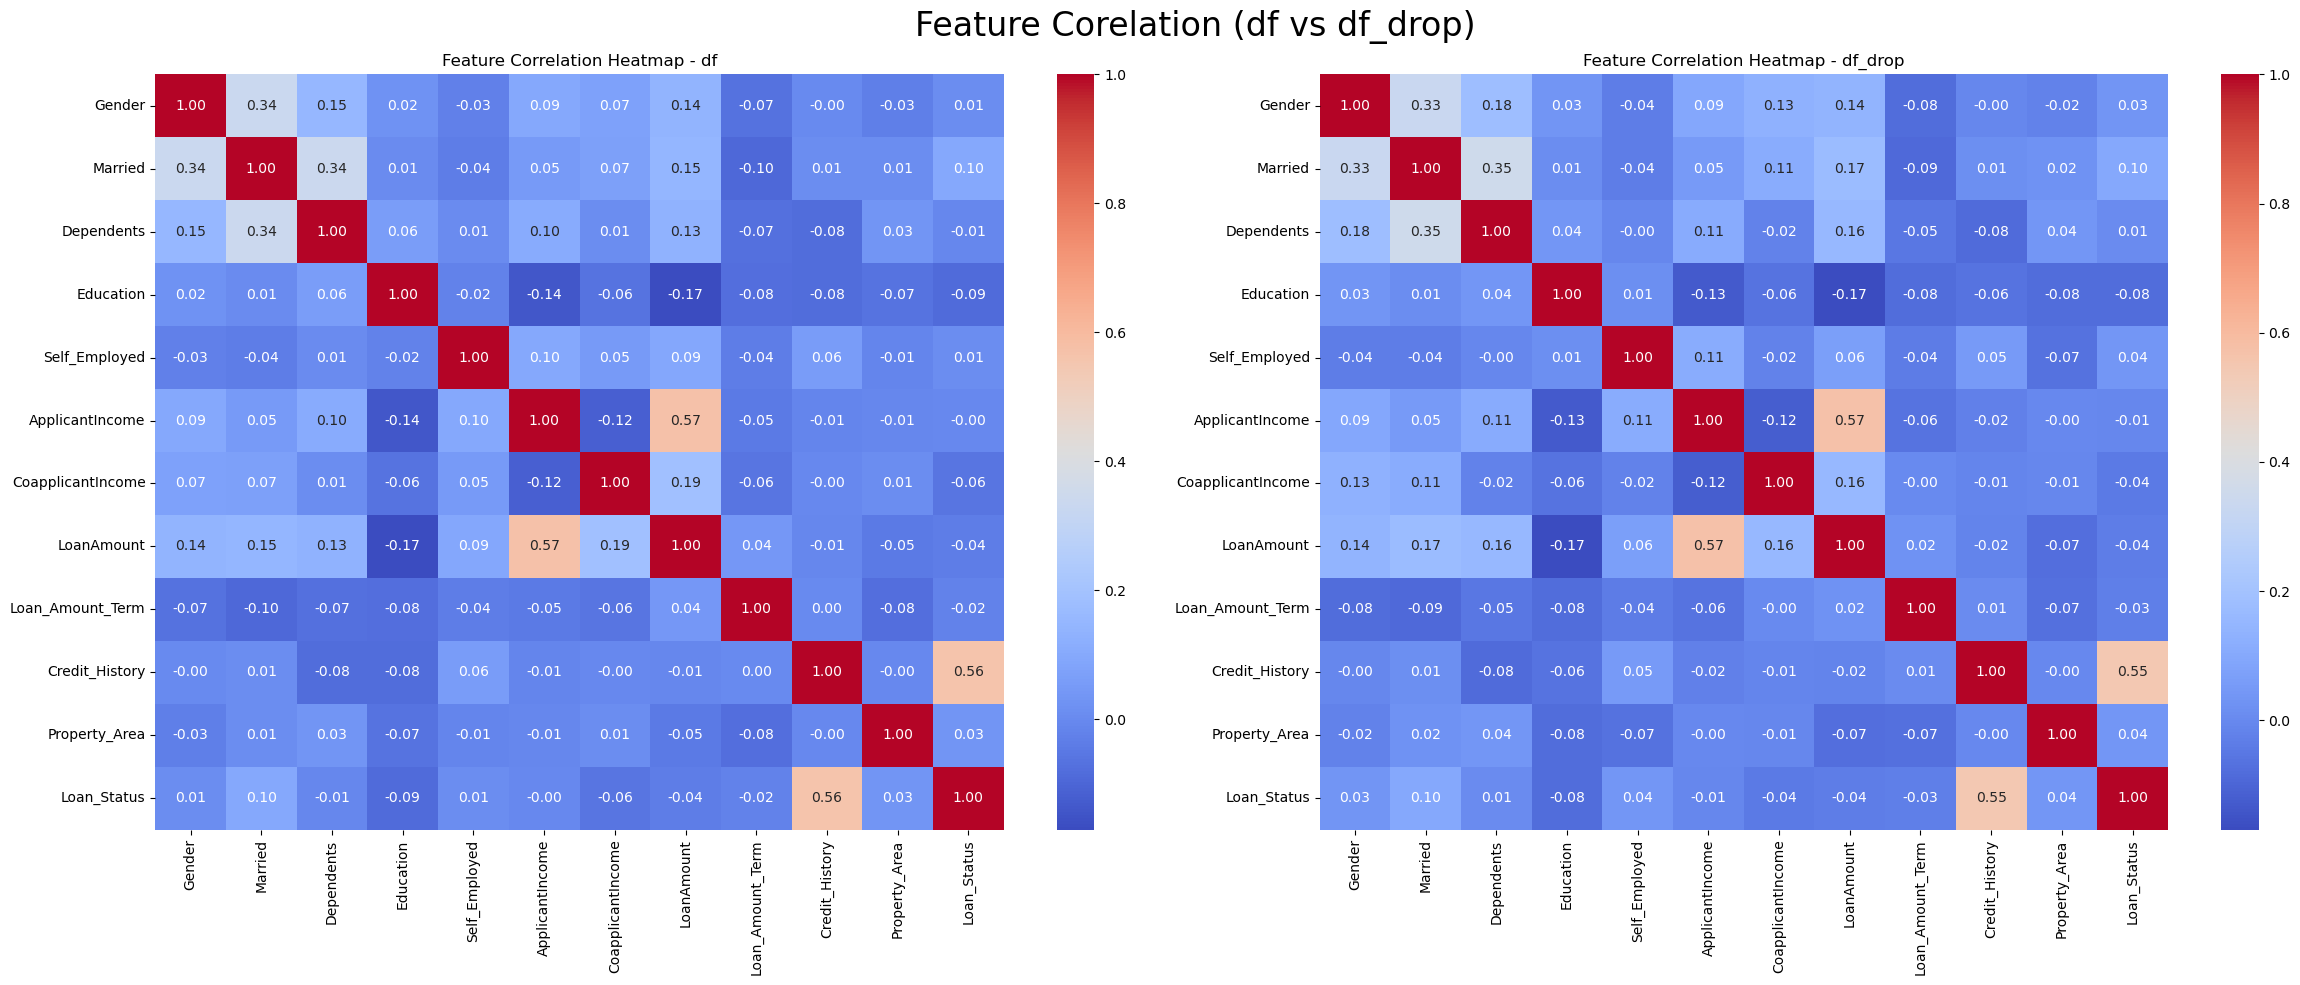

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_drop
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_drop")

plt.suptitle("Feature Corelation (df vs df_drop)", fontsize=24)
plt.tight_layout()
plt.show()

### 2) Fill Nan Values (MODE)

In [30]:
df_filled = df.copy()
df_filled.fillna(df_filled.mode().iloc[0], inplace=True)
df_filled_test = df_test.copy()
df_filled_test.fillna(df_filled_test.mode().iloc[0], inplace=True)

In [32]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_filled.shape}, {df_filled.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_filled_test.shape}, {df_filled_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


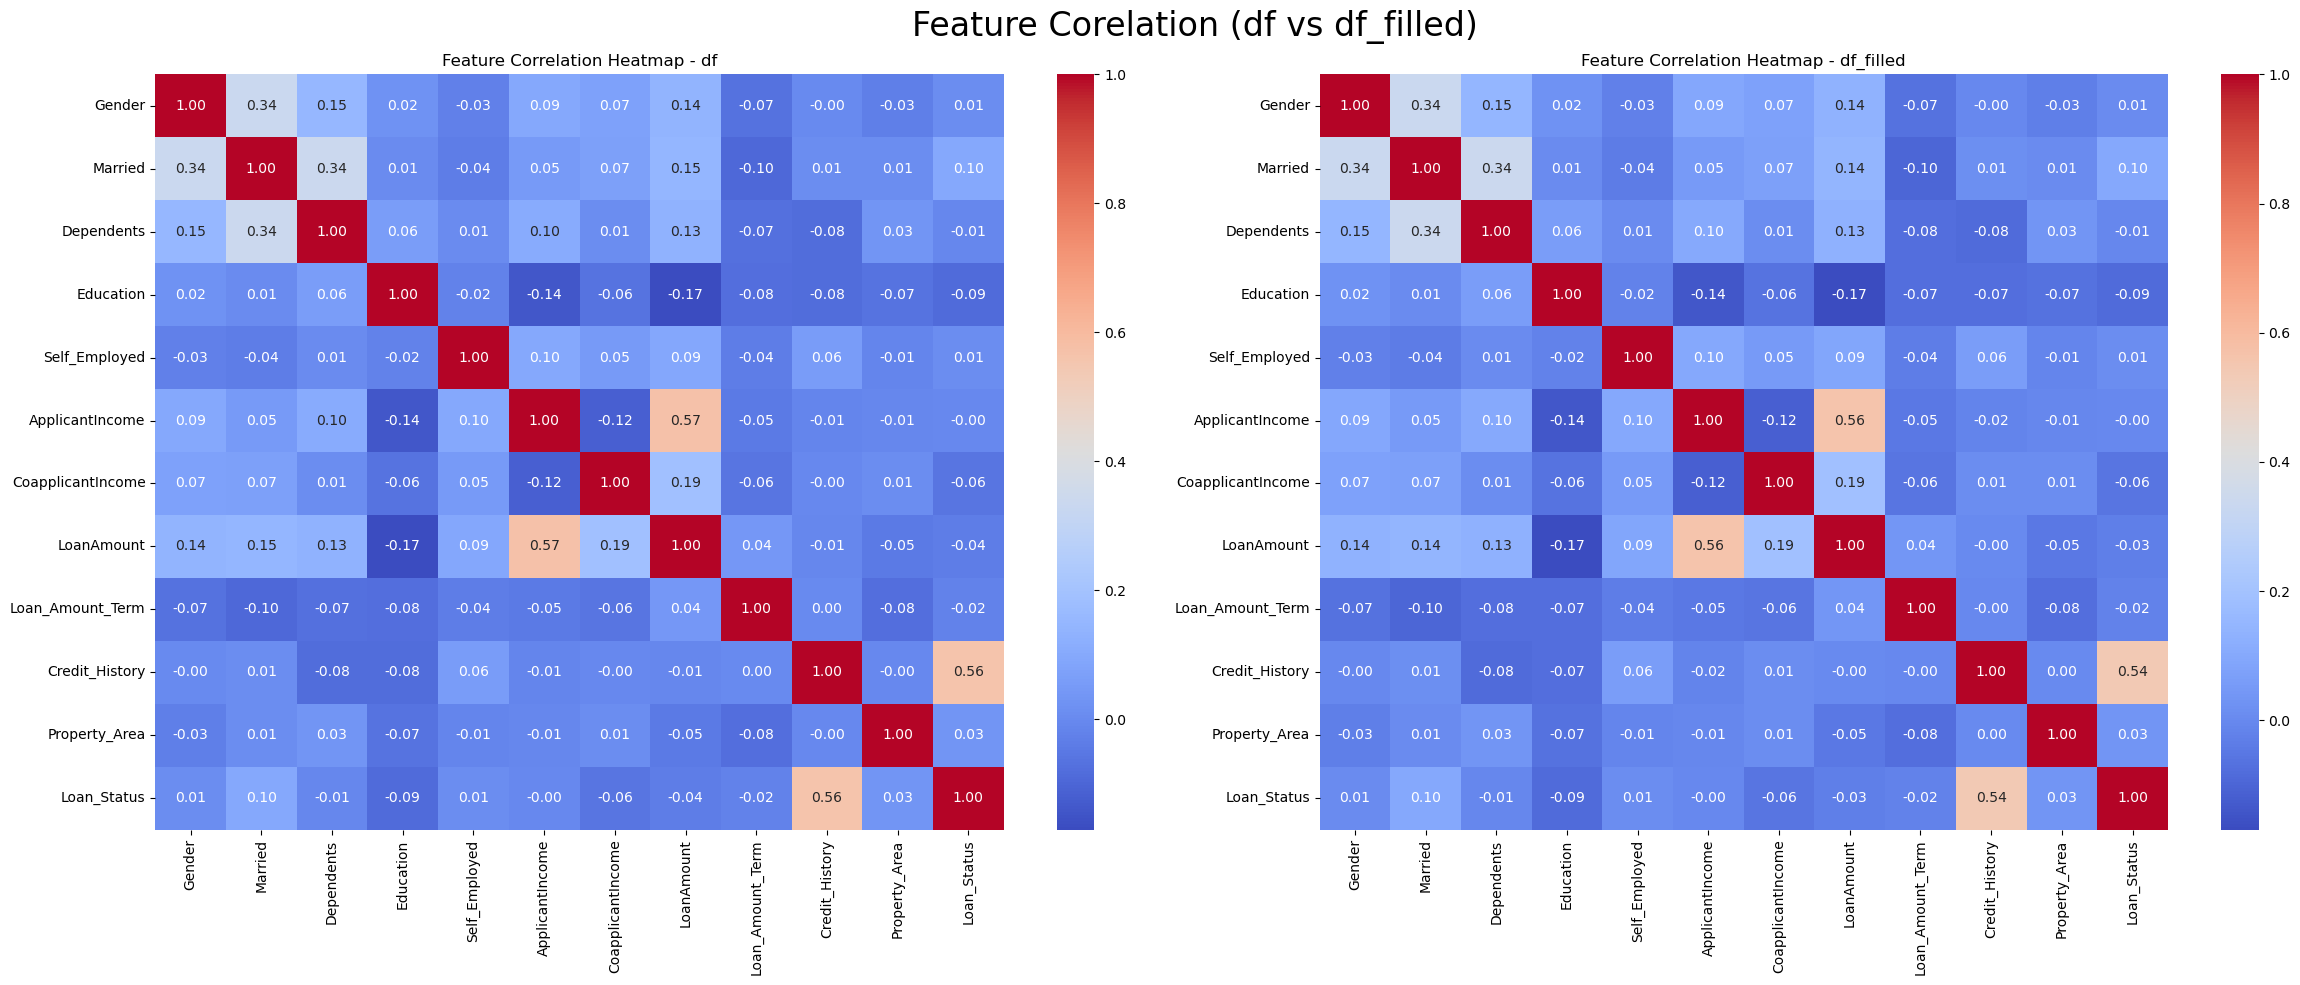

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_filled
sns.heatmap(df_filled.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_filled")

plt.suptitle("Feature Corelation (df vs df_filled)", fontsize=24)
plt.tight_layout()
plt.show()


### 3) Filling "Unknown" for all Categorial NaN values and Mean/Median for All Numerical NaN values

In [37]:
df_unknown = pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df_unknown_test =  pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")

# TRAINING DATA MISSING VALUES

for col in df_unknown.select_dtypes(include=['object']):  # Select categorical columns
    df_unknown[col] = df_unknown[col].astype(str)  # Convert to string (fix float issue)
    df_unknown[col] = df_unknown[col].fillna("Unknown")  # Fill NaN with 'Unknown'

for col in df_unknown.select_dtypes(include=['number']):  # Loop through numerical columns
    if df_unknown[col].skew() > 1 or df_unknown[col].skew() < -1:  # If highly skewed, use median
        df_unknown[col] = df_unknown[col].fillna(df_unknown[col].median())
    else:
        df_unknown[col] = df_unknown[col].fillna(df_unknown[col].mean())  # Use mean for normal distribution
        
# TESTING DATA MISSING VALUES

for col in df_unknown_test.select_dtypes(include=['object']): 
    df_unknown_test[col] = df_unknown_test[col].astype(str) 
    df_unknown_test[col] = df_unknown_test[col].fillna("Unknown") 

for col in df_unknown_test.select_dtypes(include=['number']):  
    if df_unknown_test[col].skew() > 1 or df_unknown_test[col].skew() < -1: 
        df_unknown_test[col] = df_unknown_test[col].fillna(df_unknown_test[col].median())
    else:
        df_unknown_test[col] = df_unknown_test[col].fillna(df_unknown_test[col].mean()) 

In [38]:
# ENCODINGGG
numerical_cols = df_unknown.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_unknown.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test = df_unknown_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test = df_unknown_test.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_unknown[col] = le.fit_transform(df_unknown[col])
    label_encoders[col] = le

label_encoders_test = {}
for col in categorical_cols_test:
    le_test = LabelEncoder()
    df_unknown_test[col] = le_test.fit_transform(df_unknown_test[col])
    label_encoders_test[col] = le_test


# Check data types of features
numerical_cols_new = df_unknown.select_dtypes(include=['number']).columns.tolist()
categorical_cols_new = df_unknown.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test_new = df_unknown_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test_new = df_unknown_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("LABEL ENCODING\n")
print("===TRAINING DATA===")
print(f"Categorical Columns Before: {categorical_cols} \nCategorical Colums After: {categorical_cols_new}")
print(f"Numerical Columns Before: {numerical_cols} \nCategorical Colums After: {numerical_cols_new}")

print("\n===TESTING DATA===")
print(f"Categorical Columns Before: {categorical_cols_test} \nCategorical Colums After: {categorical_cols_test_new}")
print(f"Numerical Columns Before: {numerical_cols_test} \nCategorical Colums After: {numerical_cols_test_new}")


LABEL ENCODING

===TRAINING DATA===
Categorical Columns Before: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

===TESTING DATA===
Categorical Columns Before: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', '

In [41]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_unknown.shape}, {df_unknown.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_filled_test.shape}, {df_filled_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 13), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


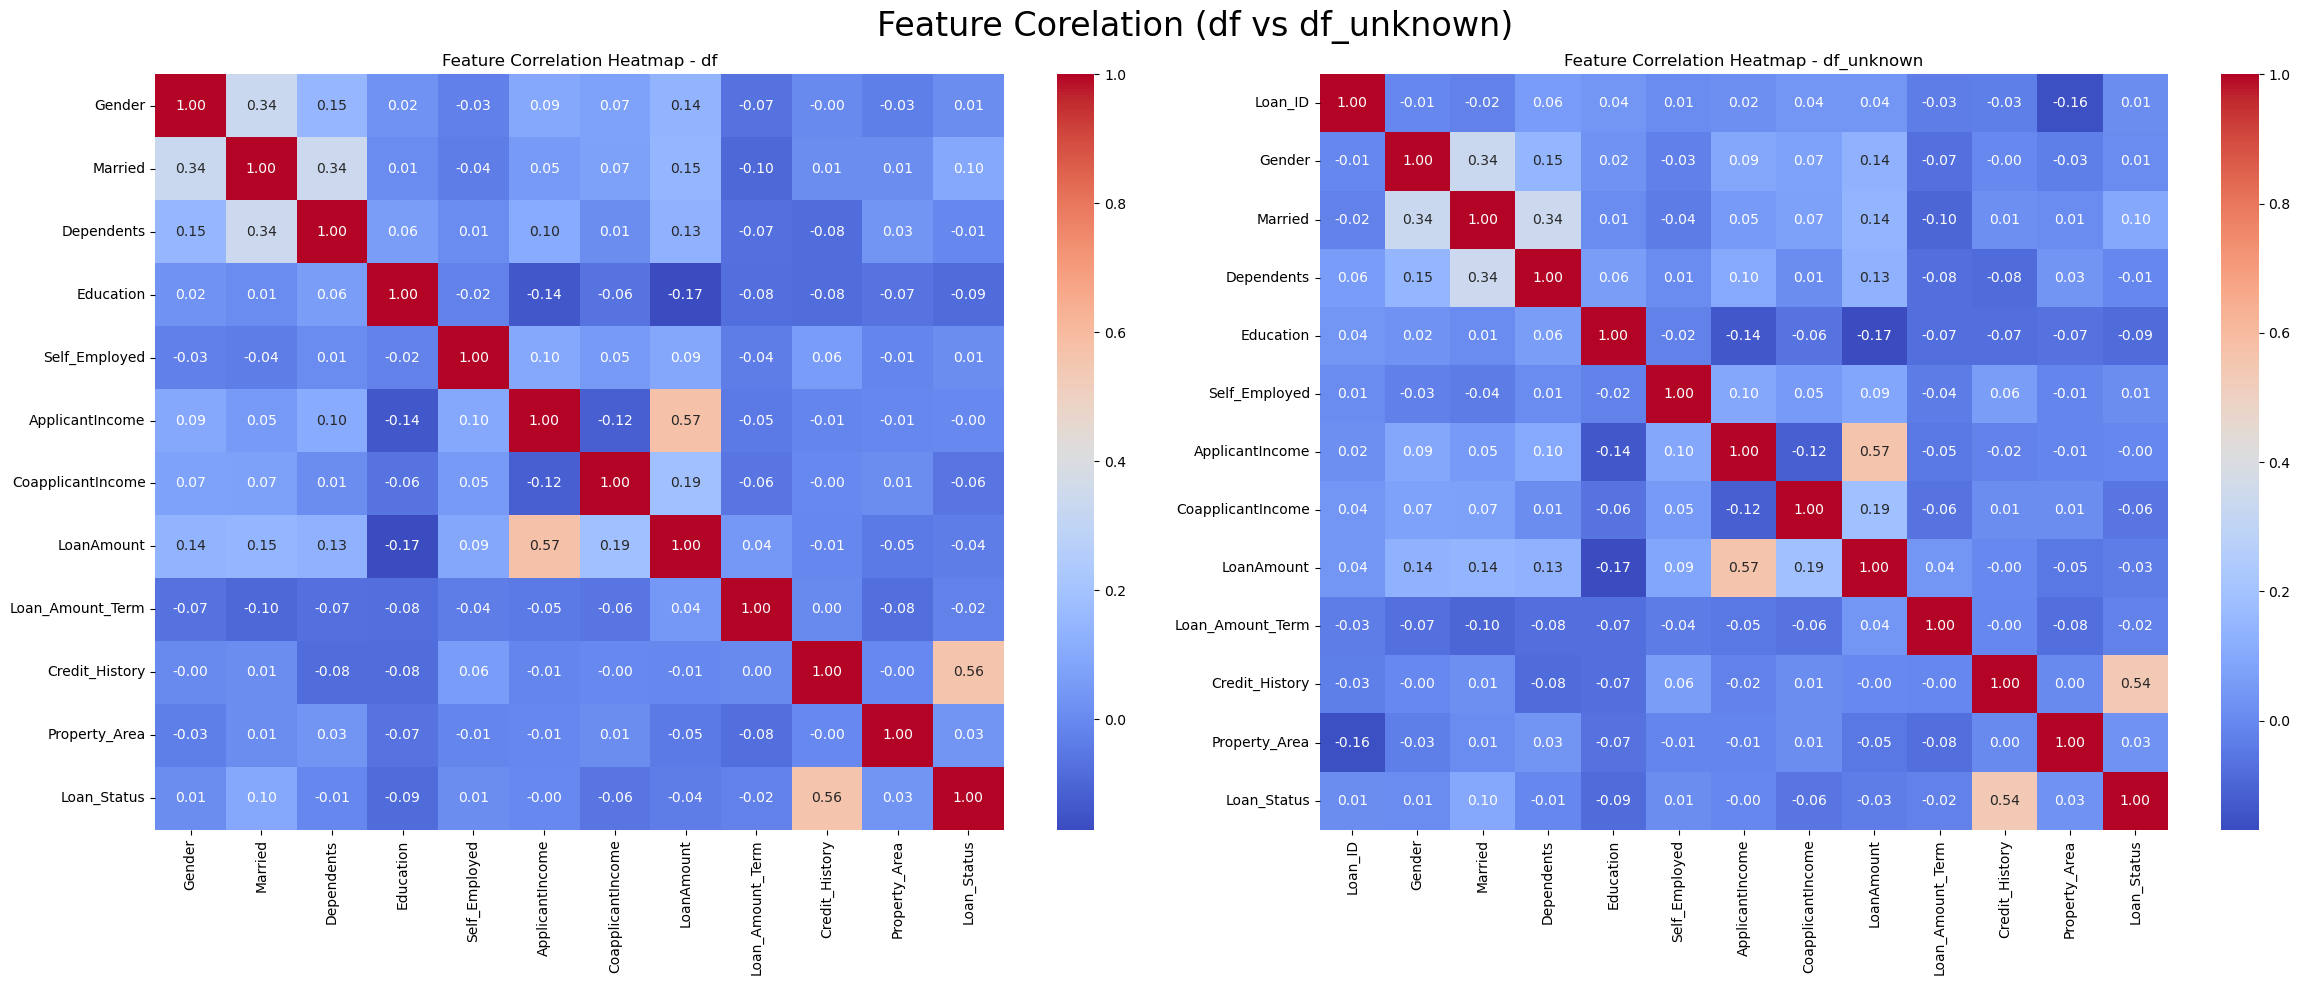

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_unknown
sns.heatmap(df_unknown.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_unknown")

plt.suptitle("Feature Corelation (df vs df_unknown)", fontsize=24)
plt.tight_layout()
plt.show()


### 4) Fill Nan with predictive Values (KNN IMPUTER)

In [46]:
df_multi_imputer = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer)

df_multi_imputer_test = df_test.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer_test.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer_test)

In [48]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_multi_imputer.shape}, {df_multi_imputer.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_multi_imputer_test.shape}, {df_multi_imputer_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


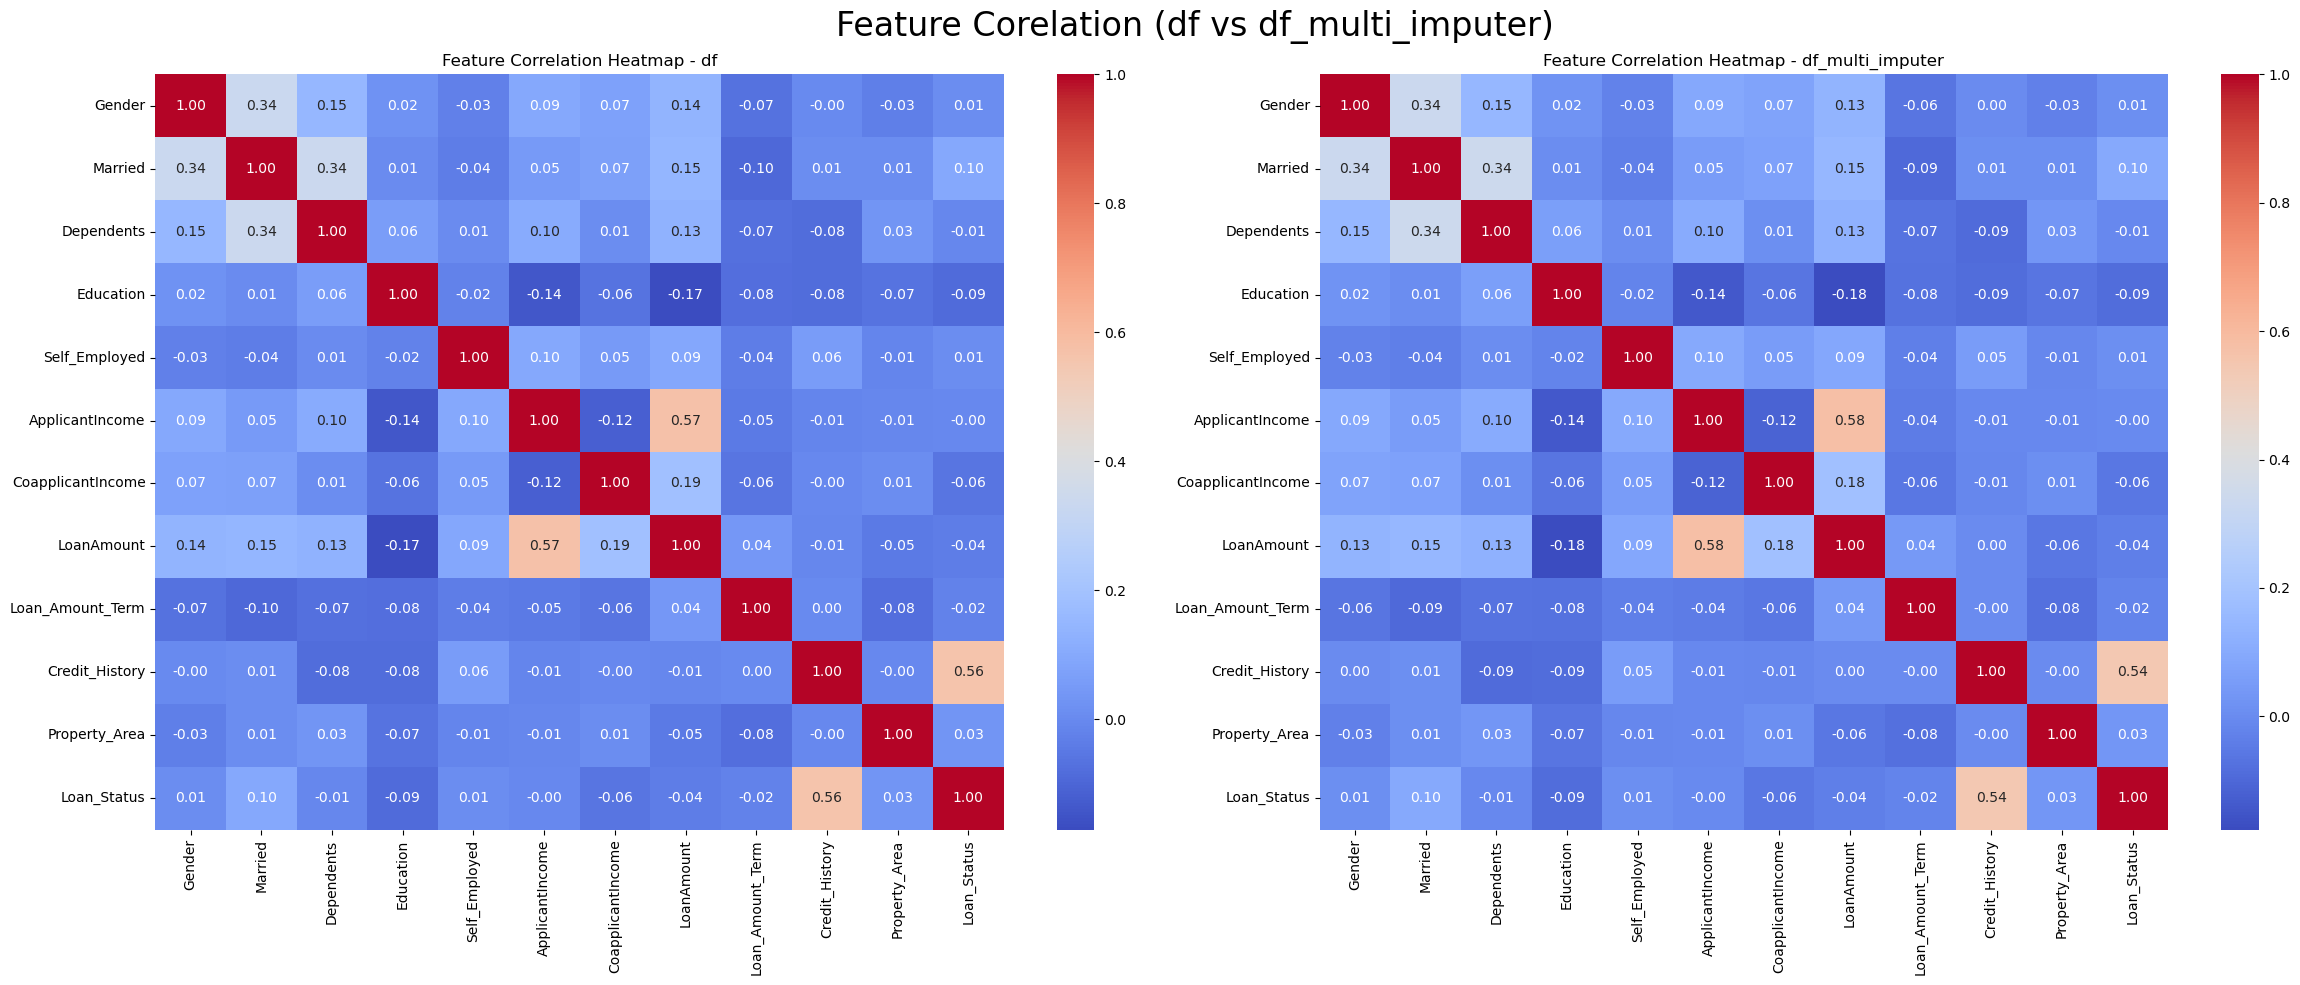

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_multi_imputer
sns.heatmap(df_multi_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_multi_imputer")

plt.suptitle("Feature Corelation (df vs df_multi_imputer)", fontsize=24)
plt.tight_layout()
plt.show()


## TRAINING THE MODEL

In [53]:
# Define models and hyperparameters
models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=17), {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(random_state=17), {'C': [0.1, 1, 10], 'max_iter': [100, 200]}),
    'SVM': (SVC(random_state=17), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Random Forest': (RandomForestClassifier(random_state=17), {'n_estimators': [50, 100], 'max_depth': [5, 10]}),
    'SGD': (SGDClassifier(random_state=17), {'alpha': [0.0001, 0.001], 'max_iter': [1000]}),
    'Naive Bayes': (GaussianNB(), {})
}
target_col = 'Loan_Status'

model_names = list(models.keys())

### 1) TRAINING: df_drop

In [56]:
results_drop = {}
trained_models_drop = {}

In [58]:
X_train = df_drop.drop(columns=[target_col])
y_train = df_drop[target_col]
X_test = df_drop_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (529, 11) 
X_test_scaled (328, 11) 
y_train(529,)


In [60]:
RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_drop[model_name] = best_model
    os.makedirs("models", exist_ok=True)
    joblib.dump(best_model, f'models/df_drop_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_drop[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 2.914567470550537 seconds and tested in 0.004998207092285156 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.026035785675048828 seconds and tested in 0.013072490692138672 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.050488948822021484 seconds and tested in 0.006000041961669922 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.08663678169250488 seconds and tested in 0.009000539779663086 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.5012426376342773 seconds and tested in 0.007069110870361328 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.017407655715942383 se

### 2) TRAINING: df_filled

In [62]:
results_filled = {}
trained_models_filled = {}

In [64]:
X_train_filled = df_filled.drop(columns=[target_col])
y_train_filled = df_filled[target_col]
X_test_filled = df_filled_test

# Standardization
scaler = StandardScaler()
X_train_filled_scaled = scaler.fit_transform(X_train_filled)
X_test_filled_scaled = scaler.fit_transform(X_test_filled)

print(f"X_train_scaled {X_train_filled_scaled.shape} \nX_test_scaled {X_test_filled_scaled.shape} \ny_train{y_train_filled.shape}")

X_train_scaled (614, 11) 
X_test_scaled (367, 11) 
y_train(614,)


In [66]:
RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_filled_sampled, _, y_train_filled_sampled, _ = train_test_split(
    X_train_filled_scaled, y_train_filled, test_size=len(X_test_filled_scaled) / len(X_train_filled_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time_filled = time.time()
    
    print(f"Training {model_name}...")
    grid_search_filled = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search_filled.fit(X_train_filled_scaled, y_train_filled)
    
    end_time_filled = time.time()

    # Best model found by GridSearchCV
    
    best_model_filled = grid_search_filled.best_estimator_
    trained_models_filled[model_name] = best_model_filled
    joblib.dump(best_model, f'df_filled_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test_filled = time.time()
    
    y_pred_filled_sampled = best_model_filled.predict(X_train_filled_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_filled_sampled, y_pred_filled_sampled)  # Compare with actual labels
    report = classification_report(y_train_filled_sampled, y_pred_filled_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_filled_sampled, y_pred_filled_sampled)
    
    end_time_test_filled = time.time()

    # Store results
    results_filled[model_name] = {
        'Best Params': grid_search_filled.best_params_,
        'Train Accuracy': grid_search_filled.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time_filled - start_time_filled,
        'Testing Time': end_time_test_filled - start_time_test_filled,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time_filled - start_time_filled} seconds and tested in {end_time_test_filled - start_time_test_filled} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.038576364517211914 seconds and tested in 0.005000591278076172 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.037748098373413086 seconds and tested in 0.01700592041015625 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.042083024978637695 seconds and tested in 0.006992816925048828 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.11115670204162598 seconds and tested in 0.007999420166015625 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.43720412254333496 seconds and tested in 0.0076520442962646484 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.02904629707336425

### 3) TRAINING: df_unknown

In [69]:
results_unknown = {}
trained_models_unknown = {}

In [71]:
X_train = df_unknown.drop(columns=[target_col])
y_train = df_unknown[target_col]
X_test = df_unknown_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (614, 12) 
X_test_scaled (367, 12) 
y_train(614,)


In [73]:
RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_unknown[model_name] = best_model
    joblib.dump(best_model, f'df_unknown_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_unknown[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.04024958610534668 seconds and tested in 0.005949735641479492 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.03881406784057617 seconds and tested in 0.015006780624389648 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.040128469467163086 seconds and tested in 0.005999565124511719 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.09932565689086914 seconds and tested in 0.006998300552368164 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.48332786560058594 seconds and tested in 0.00999307632446289 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.028134584426879883 s

### 4) TRAINING: df_multi_imputer

In [76]:
results_multi = {}
trained_models_multi = {}

In [78]:
X_train = df_multi_imputer.drop(columns=[target_col])
y_train = df_multi_imputer[target_col]
X_test = df_multi_imputer_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (614, 11) 
X_test_scaled (367, 11) 
y_train(614,)


In [80]:
RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_multi[model_name] = best_model
    joblib.dump(best_model, f'df_multi_imputer_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_multi[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.03914499282836914 seconds and tested in 0.0049893856048583984 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.03756833076477051 seconds and tested in 0.015006542205810547 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.04323148727416992 seconds and tested in 0.009001731872558594 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.11085700988769531 seconds and tested in 0.009006500244140625 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.48360133171081543 seconds and tested in 0.010010480880737305 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.028831005096435547 

## Choosing the right model

In [83]:
accuracy = {}
precision = {}
recall = {}
f1_score = {}
training_time = {}
testing_time = {}

for model, result in results_drop.items():
    accuracy[model] = []
    precision[model] = []
    recall[model] = []
    f1_score[model] = []
    training_time[model] = []
    testing_time[model] = []
    
for model, result in results_drop.items():
    accuracy[model].append(result['Train Accuracy'])
    precision[model].append(result['Classification Report']['weighted avg']['precision'])
    recall[model].append(result['Classification Report']['weighted avg']['recall'])
    f1_score[model].append(result['Classification Report']['weighted avg']['f1-score'])
    training_time[model].append(result['Training Time'])
    testing_time[model].append(result['Testing Time'])
    
for model, result in results_filled.items():
    accuracy[model].append(result['Train Accuracy'])
    precision[model].append(result['Classification Report']['weighted avg']['precision'])
    recall[model].append(result['Classification Report']['weighted avg']['recall'])
    f1_score[model].append(result['Classification Report']['weighted avg']['f1-score'])
    training_time[model].append(result['Training Time'])
    testing_time[model].append(result['Testing Time'])

for model, result in results_unknown.items():
    accuracy[model].append(result['Train Accuracy'])
    precision[model].append(result['Classification Report']['weighted avg']['precision'])
    recall[model].append(result['Classification Report']['weighted avg']['recall'])
    f1_score[model].append(result['Classification Report']['weighted avg']['f1-score'])
    training_time[model].append(result['Training Time'])
    testing_time[model].append(result['Testing Time'])

for model, result in results_multi.items():
    accuracy[model].append(result['Train Accuracy'])
    precision[model].append(result['Classification Report']['weighted avg']['precision'])
    recall[model].append(result['Classification Report']['weighted avg']['recall'])
    f1_score[model].append(result['Classification Report']['weighted avg']['f1-score'])
    training_time[model].append(result['Training Time'])
    testing_time[model].append(result['Testing Time'])

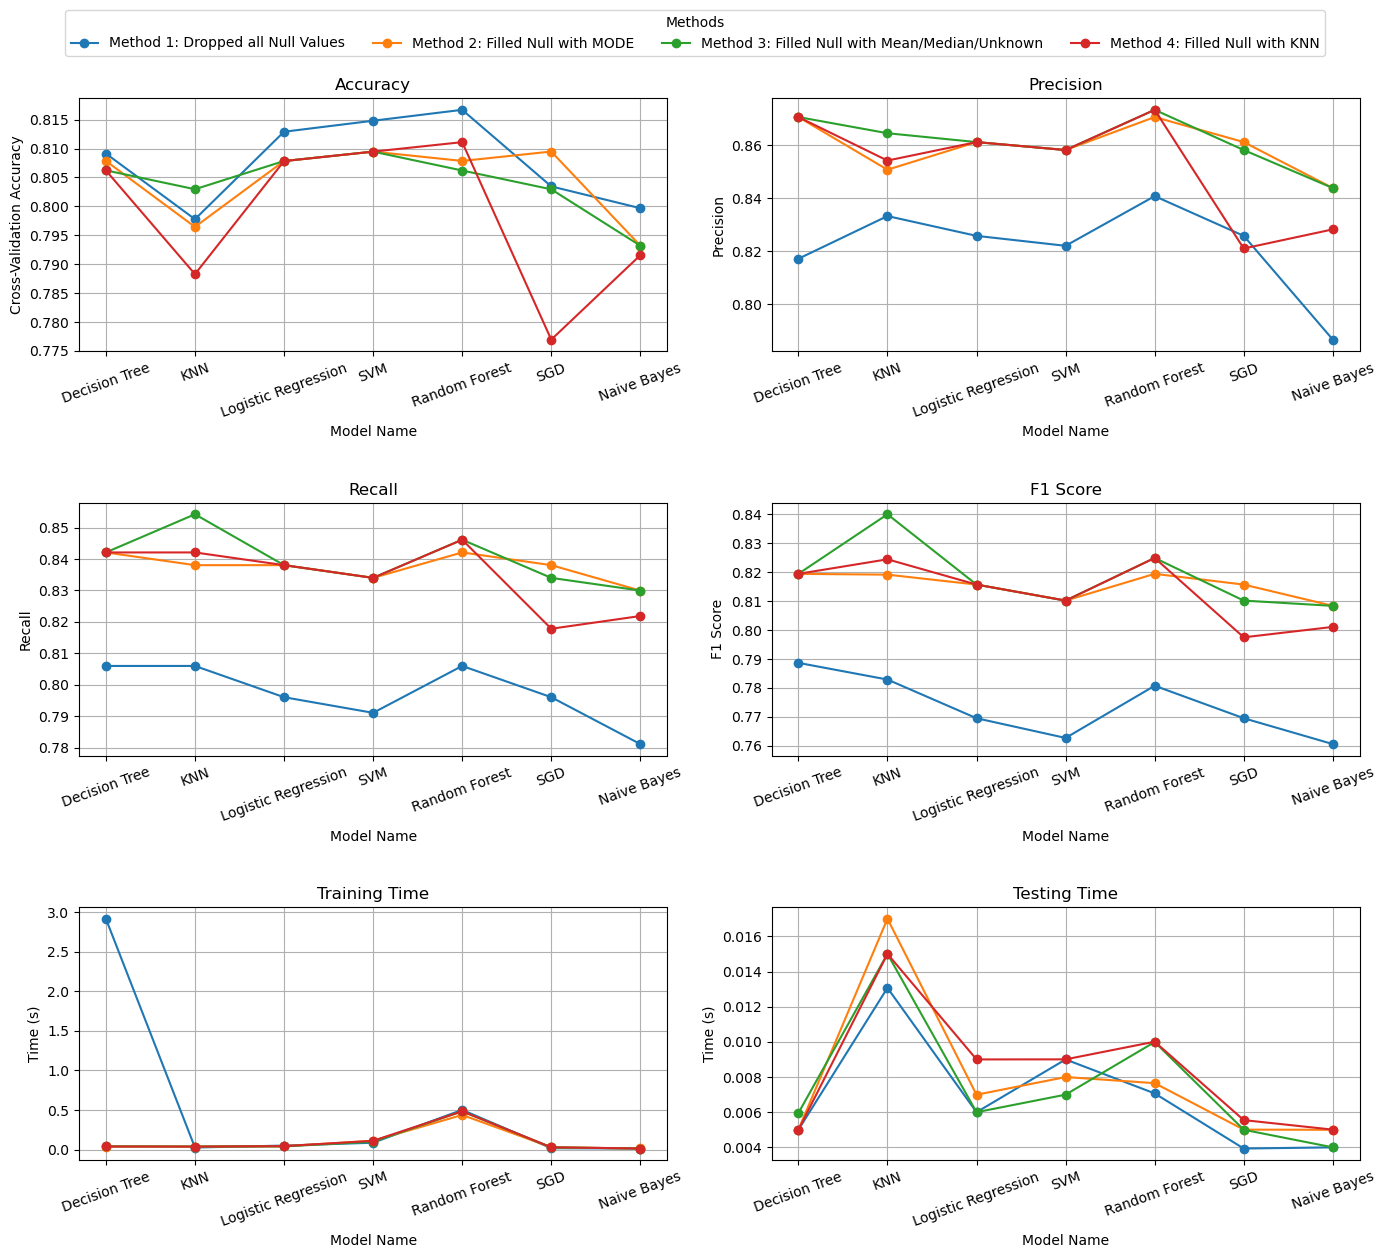

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# List of 6 dictionaries (assuming you have them as dict1, dict2, ..., dict6)
dictionaries = [accuracy, precision, recall, f1_score, training_time, testing_time] 
titles = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time", "Testing Time"]
x_label = ["Cross-Validation Accuracy", "Precision", "Recall", "F1 Score", "Time (s)", "Time (s)"]

# Define grid layout
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=False)  # 3x2 grid

# Store legend handles to create one global legend later
legend_handles = []

# Loop through each dictionary and plot in its respective subplot
for i, (ax, metric_dict) in enumerate(zip(axes.flatten(), dictionaries)):
    models = list(metric_dict.keys())  # Model names
    metric_values = np.array(list(metric_dict.values()))  # Convert metric data (7x4 shape)

    # Ensure consistent x-ticks before setting labels (Fixes warning)
    ax.set_xticks(range(len(models)))  # Set fixed positions
    ax.set_xticklabels(models, rotation=20)  # Now set labels safely

    # Plot the lines for each method
    for method_idx in range(4):
        method_accuracies = metric_values[:, method_idx]
        line, = ax.plot(models, method_accuracies, marker='o', linestyle='-', label=f'Method {method_idx + 1}')
        
        # Store legend handles only once (from the first subplot)
        if i == 0:
            legend_handles.append(line)

    # Formatting for each subplot
    ax.set_title(titles[i])
    ax.set_xlabel("Model Name")
    ax.set_ylabel(x_label[i])
    ax.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Create a single legend outside of all subplots
all_methods = ['Method 1: Dropped all Null Values', 'Method 2: Filled Null with MODE', 'Method 3: Filled Null with Mean/Median/Unknown', 'Method 4: Filled Null with KNN']
fig.legend(handles=legend_handles, labels=[f'{i}' for i in all_methods], 
           title="Methods", loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

# Show the plot
plt.subplots_adjust(hspace=0.6)  # Adjust vertical spacing between rows
plt.show()


### 📜 Observations: 

##### Accuracy?
- ✅ We get the best cross-validation accuracy with **Random Forest** for **method 1**, that is dropping all the null values. Some other methods have lesser accuracy (almost similar), but we can overall see a spike in the accuracy of Random Forest for data preprocessing method.

##### Precision? 
- ✅ The best precision is for **Random Forest** for **method 4**, which is imputation of null values with KNN. And we can see overall precision better for a random forest than any other model.

##### Recall? 

- ✅ Recall was the best for **KNN** using **method 3**, i.e. filling null values with unknown (categorial) and mean/median (numerical).  The second best recall score is for Random Forest using method 4 (KNN).

##### F1-Score? 

- ✅ Finally F1-score is again best for **KNN** using **method 3**. The second best is **Random Forest** with **method 4**.

---
### 📌 RESULT

Finally I choose the **RANDOM FOREST** model with **METHOD 4**, which is first filling all the null values with the help of KNN multi-variate imputation. This is because we get the best accuracy and most of the scores for Random Forest, with a better score using the KNN imputation. Using this model, the final calculations will be made. Further to increase score, we can use feature reduction and SMOTE to handle class imbalance and retrain the model. Choosing the **METHOD 4** because it performs overall best for all the score metrics.

---
### SCORE TILL NOW:
**RANDOM FOREST (METHOD 4)** 

| Accuracy | Precision | Recall | F1-Score |
|----------|-----------|--------|----------|
| 0.8111   | 0.8733    | 0.8462 | 0.82495  |

In [213]:
for models, value in results_multi.items():
    print(f"{models} Best Hyperparameters| {value['Best Params']}")
    print(f"{models} Accuracy | {round(value['Train Accuracy'], 2)} \n")
    

Decision Tree Best Hyperparameters| {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Accuracy | 0.81 

KNN Best Hyperparameters| {'n_neighbors': 7}
KNN Accuracy | 0.79 

Logistic Regression Best Hyperparameters| {'C': 0.1, 'max_iter': 100}
Logistic Regression Accuracy | 0.81 

SVM Best Hyperparameters| {'C': 0.1, 'kernel': 'linear'}
SVM Accuracy | 0.81 

Random Forest Best Hyperparameters| {'max_depth': 5, 'n_estimators': 100}
Random Forest Accuracy | 0.81 

SGD Best Hyperparameters| {'alpha': 0.001, 'max_iter': 1000}
SGD Accuracy | 0.78 

Naive Bayes Best Hyperparameters| {}
Naive Bayes Accuracy | 0.79 



## Feature Reduction and Class Imbalance Handling

###  1) Feature Importance Analysis (Using Random Forest)

Feature Importances:
              Feature  Importance
9      Credit_History    0.274796
5     ApplicantIncome    0.193476
7          LoanAmount    0.181151
6   CoapplicantIncome    0.113016
10      Property_Area    0.045911
2          Dependents    0.045417
8    Loan_Amount_Term    0.044720
4       Self_Employed    0.028092
1             Married    0.027374
0              Gender    0.024350
3           Education    0.021696


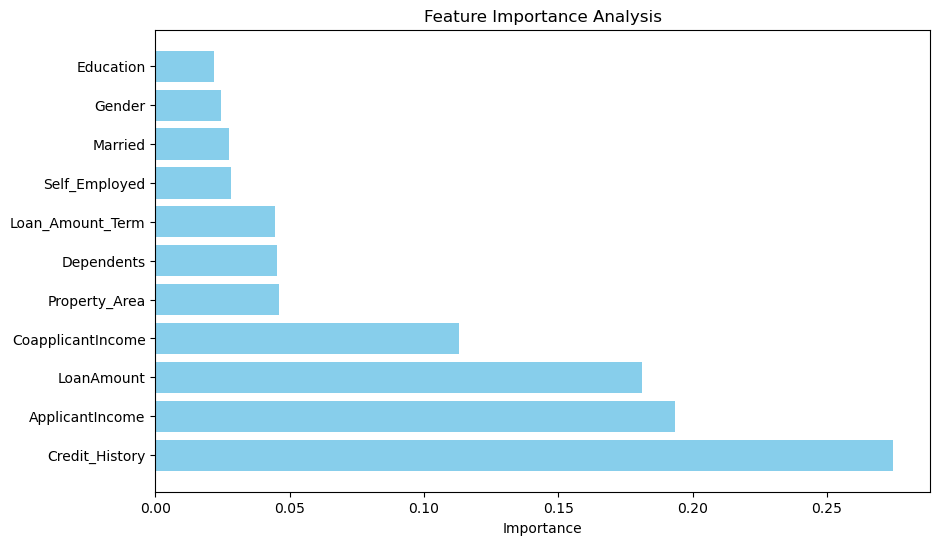

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_final, y_train_final)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': rf.feature_importances_  # Importance scores
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()

### 2) Handling Class Imbalance (SMOTE)

In [110]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=17)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

# Print the class distribution before and after SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train_final)}")
print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

Class distribution before SMOTE: Counter({1: 422, 0: 192})
Class distribution after SMOTE: Counter({1: 422, 0: 422})


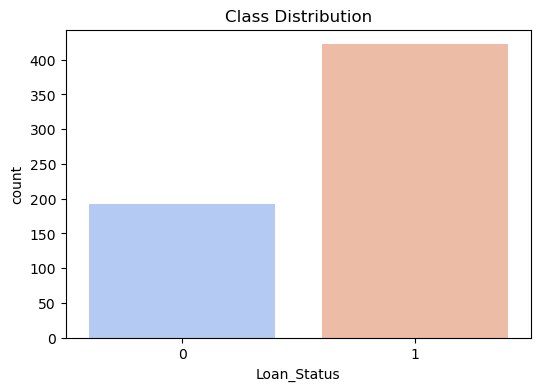

In [112]:
target_col = "Loan_Status"
plt.figure(figsize=(6,4))
sns.countplot(data=final_dataset, x=target_col, hue=target_col, palette='coolwarm', legend=False)
plt.title('Class Distribution')
plt.show()

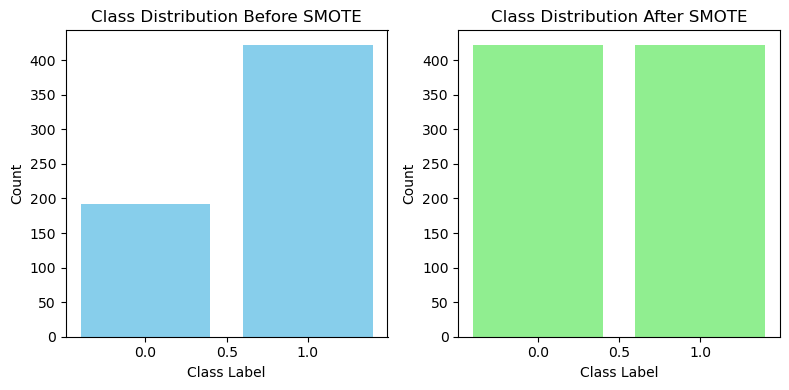

In [114]:

# Plot the class distributions
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot before SMOTE
axes[0].bar(Counter(y_train_final).keys(), Counter(y_train_final).values(), color='skyblue')
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class Label")
axes[0].set_ylabel("Count")

# Plot after SMOTE
axes[1].bar(Counter(y_train_resampled).keys(), Counter(y_train_resampled).values(), color='lightgreen')
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class Label")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


## Re-Train the Model with SMOTE Dataset (BEST MODEL with best parameters)

In [128]:
# BEST PARAMETERS
results_multi['Random Forest']['Best Params']

{'max_depth': 5, 'n_estimators': 100}

In [130]:
# Standardization
scaler = StandardScaler()
X_train_re = scaler.fit_transform(X_train_resampled)
y_train_re = y_train_resampled

print(f"X_train_re {X_train_re.shape} \ny_train_re{y_train_re.shape}")

X_train_re (844, 11) 
y_train_re(844,)


In [132]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf.fit(X_train_re, y_train_re)

model_filename = 'models/Final_model.pkl'
joblib.dump(rf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as models/Final_model.pkl


In [134]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

model_filename = 'models/Final_model.pkl'
rf = joblib.load(model_filename)

y_pred = rf.predict(X_train_re)

# Calculate accuracy
accuracy = accuracy_score(y_train_re, y_pred)
print(f"Accuracy: {accuracy:}")

# Classification report (precision, recall, f1-score)
report = classification_report(y_train_resampled, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)


Accuracy: 0.8293838862559242
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.71      0.81       422
     Class 1       0.77      0.95      0.85       422

    accuracy                           0.83       844
   macro avg       0.85      0.83      0.83       844
weighted avg       0.85      0.83      0.83       844




| Accuracy | Precision | Recall | F1-Score |
|----------|-----------|--------|----------|
| 0.83   |  0.84     |  0.82  |   0.81   |

## BEST OVERALL MODEL: 

### Best HyperParameter Accuracy for Every Algorithm

- We choose method 4 of training algorithms which is filling the dataset with a KNN multi-imputator, which gives the best overall results for all the algorithms. Here is the final output.



|      Algorithm          |Accuracy|            Hyperparameters            |
|-------------------------|--------|---------------------------------------|
| Decision Tree           |  0.81  | {'max_depth': 3, 'min_samples_split': 2} |
| KNN                     |  0.79  | {'n_neighbors': 7}                       |
| Logistic Regression     |  0.81  | {'C': 0.1, 'max_iter': 100} |
| SVM                     |  0.81  | {'C': 0.1, 'kernel': 'linear'} |
| Random Forest           |  0.83  | {'max_depth': 5, 'n_estimators': 100} |
| Naive Bayes             |  0.79  | {} |
| SGD                     |  0.78  | {'alpha': 0.001, 'max_iter': 1000}


---
### Best Overall


|   Algorithm   |Accuracy|            Hyperparameters            |
|---------------|--------|---------------------------------------|
| Random Forest |  0.83  | {'max_depth': 5, 'n_estimators': 100} |

## Final Y Predictions on TEST data

In [169]:
model_filename = 'models/Final_model.pkl'
rf = joblib.load(model_filename)

df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")
df = df.drop(columns="Loan_ID")

X_test_unknown = df.copy()

categorical_cols = X_test_unknown.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_test_unknown[col] = le.fit_transform(X_test_unknown[col])
    label_encoders[col] = le  # Store encoders if needed later

In [171]:
X_test_unknown.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [173]:
scaler = StandardScaler()

X_test_unknown_scaled = scaler.fit_transform(X_test_unknown)  # Fit on same scale as training

y_pred_unknown = rf.predict(X_test_unknown_scaled)

In [175]:
final_df = df.copy()
final_df['Predicted_Target'] = y_pred_unknown

final_filename = 'models/final_predictions.csv'
final_df.to_csv(final_filename, index=False)
print(f"Final predictions saved as '{final_filename}'")

final_df.head()

Final predictions saved as 'models/final_predictions.csv'


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Target
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
